In [17]:
# !wget -nc https://lazyprogrammer.me/course_files/sp500_closefull.csv

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [19]:
df0 = pd.read_csv('sp500_closefull.csv', index_col=0, parse_dates=True)
df0.dropna(axis=0, how='all', inplace=True)
df0.dropna(axis=1, how='any', inplace=True)
df0

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.800000,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.200000,3.510000,238.580002,30.242558
2010-01-05,24.580000,13.910000,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.110000,3.615000,239.610001,29.851370
2010-01-06,24.420000,13.270000,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.380000,3.695000,234.669998,29.916569
2010-01-07,24.530001,13.550000,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.820000,3.651250,237.250000,29.627834
2010-01-08,24.660000,13.330000,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.770000,3.643750,238.919998,29.534695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,41.849998,81.470001,86.779999,446.019989,37.029999,32.810001,21.910000,13.450000,304.549988,156.500000,...,28.200001,122.910004,59.419998,176.559998,33.770000,127.160004,18.860001,16.959999,369.160004,28.400000
2018-12-24,40.279999,79.120003,84.949997,434.890015,36.500000,32.299999,20.980000,12.660000,294.160004,151.910004,...,28.150000,121.330002,57.070000,173.539993,33.200001,123.279999,17.950001,16.750000,361.769989,27.590000
2018-12-26,42.470001,83.800003,89.650002,461.980011,40.700001,33.889999,22.709999,14.170000,313.929993,161.839996,...,30.129999,130.839996,59.330002,181.190002,34.400002,130.839996,18.910000,17.820000,381.230011,28.309999


In [20]:
df_returns = pd.DataFrame()
for name in df0.columns:
    df_returns[name] = np.log(df0[name]).diff()

/tmp/ipykernel_58407/121027654.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_returns[name] = np.log(df0[name]).diff()
/tmp/ipykernel_58407/121027654.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_returns[name] = np.log(df0[name]).diff()
/tmp/ipykernel_58407/121027654.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [21]:
Ntest = 1000
train = df_returns.iloc[:-Ntest].copy()
test = df_returns.iloc[-Ntest:].copy()

In [22]:
class Env:
    def __init__(self, df, feats):
        self.df = df
        self.n = len(df)
        self.current_idx = 0
        self.action_space = [0, 1, 2]  # BUY, SELL, HOLD
        self.invested = 0
        
        self.states = self.df[feats].to_numpy()
        self.rewards = self.df['SPY'].to_numpy()

    def reset(self):
        self.current_idx = 0
        return self.states[self.current_idx]
    
    def step(self, action):
        # need to return (next_state, reward, done)
        self.current_idx += 1
        
        if self.current_idx >= self.n:
            raise Exception("Episode already done")
        
        if action == 0:  # BUY
            self.invested = 1
        elif action == 1:  # SELL
            self.invested = 0
        
        # Compute reward
        if self.invested:
            reward = self.rewards[self.current_idx]
        else:
            reward = 0
        
        # State transition
        next_state = self.states[self.current_idx]
        
        # Check if the episode is done
        done = (self.current_idx == self.n - 1)
        
        return next_state, reward, done


In [23]:
class StateMapper:
    def __init__(self, env, n_bins=6, n_samples=10_000):
        # First, collect sample states from the environment
        states = []
        done = False
        s = env.reset()
        self.D = len(s)  # Number of elements we need to bin
        states.append(s)
        
        for _ in range(n_samples):
            a = np.random.choice(env.action_space)
            s2, _, done = env.step(a)
            states.append(s2)
            if done:
                s = env.reset()
                states.append(s)
        
        # Convert to numpy array for easy indexing
        states = np.array(states)
        
        # Create the bins for each dimension
        self.bins = []
        for d in range(self.D):
            column = np.sort(states[:, d])
            
            # Find the boundaries for each bin
            current_bin = []
            for k in range(n_bins):
                boundary = column[int(n_samples / n_bins * (k + 0.5))]
                current_bin.append(boundary)
            self.bins.append(current_bin)

    def transform(self, state):
        x = np.zeros(self.D)
        for d in range(self.D):
            x[d] = int(np.digitize(state[d], self.bins[d]))
        return tuple(x)
    
    def all_possible_states(self):
        list_of_bins = []
        for d in range(self.D):
            list_of_bins.append(list(range(len(self.bins[d]) + 1)))
        # print(list_of_bins)
        return itertools.product(*list_of_bins)

In [24]:
class Agent:
    def __init__(self, action_size, state_mapper):
        self.action_size = action_size
        self.gamma = 0.8  # Discount rate
        self.epsilon = 0.1
        self.learning_rate = 1e-1
        self.state_mapper = state_mapper

        # Initialize Q-table randomly
        self.Q = {}
        for s in self.state_mapper.all_possible_states():
            s = tuple(s)
            for a in range(self.action_size):
                self.Q[(s, a)] = np.random.randn()

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)

        s = self.state_mapper.transform(state)
        act_values = [self.Q[(s, a)] for a in range(self.action_size)]
        return np.argmax(act_values)  # returns action

    def train(self, state, action, reward, next_state, done):
        s = self.state_mapper.transform(state)
        s2 = self.state_mapper.transform(next_state)

        if done:
            target =reward
        else:
            act_values = [self.Q[(s2, a)] for a in range(self.action_size)]
            target = reward + self.gamma * np.amax(act_values)

        self.Q[(s, action)] += self.learning_rate * (target-self.Q[(s, action)])


In [25]:
def play_one_episode(agent, env, is_train):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        total_reward += reward

        if is_train:
            agent.train(state, action, reward, next_state, done)

        state = next_state

    return total_reward

num_episodes = 500

feats = ['AAPL', 'MSFT', 'AMZN']
train_env = Env(train, feats)
test_env = Env(test, feats)


In [26]:
action_size = len(train_env.action_space)
state_mapper = StateMapper(train_env)
agent = Agent(action_size, state_mapper)

train_rewards = np.empty(num_episodes)
test_rewards = np.empty(num_episodes)

Episode: 1/500, Train Reward: 0.23286, Test Reward: -0.02492
Episode: 2/500, Train Reward: 0.36763, Test Reward: -0.09907
Episode: 3/500, Train Reward: 0.44214, Test Reward: -0.15572
Episode: 4/500, Train Reward: 0.14158, Test Reward: -0.03877
Episode: 5/500, Train Reward: 0.46183, Test Reward: -0.07498
Episode: 6/500, Train Reward: 0.11787, Test Reward: -0.01374
Episode: 7/500, Train Reward: 0.16263, Test Reward: -0.00838
Episode: 8/500, Train Reward: 0.29683, Test Reward: 0.00548
Episode: 9/500, Train Reward: 0.29608, Test Reward: 0.07075
Episode: 10/500, Train Reward: 0.26466, Test Reward: 0.03212
Episode: 11/500, Train Reward: 0.59957, Test Reward: 0.07252
Episode: 12/500, Train Reward: 0.10676, Test Reward: 0.00658
Episode: 13/500, Train Reward: 0.39778, Test Reward: -0.04343
Episode: 14/500, Train Reward: 0.26843, Test Reward: 0.15025
Episode: 15/500, Train Reward: 0.07506, Test Reward: 0.02199
Episode: 16/500, Train Reward: 0.26116, Test Reward: 0.01025
Episode: 17/500, Train Re

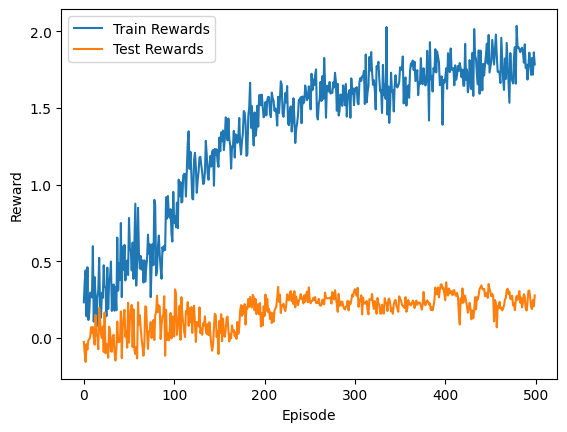

In [27]:
for e in range(num_episodes):
    r = play_one_episode(agent, train_env, is_train=True)
    train_rewards[e] = r  # Store the reward from the training episode
    
    # Test on the test set
    tmp_epsilon = agent.epsilon
    agent.epsilon = 0.  # Set epsilon to 0 for testing
    tr = play_one_episode(agent, test_env, is_train=False)
    agent.epsilon = tmp_epsilon  # Restore the original epsilon
    
    test_rewards[e] = tr  # Store the reward from the testing episode
    
    # Print progress
    print(f"Episode: {e + 1}/{num_episodes}, Train Reward: {r:.5f}, Test Reward: {tr:.5f}")

# Plot the rewards
plt.plot(train_rewards, label='Train Rewards')
plt.plot(test_rewards, label='Test Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()
